# Correlation of Motivated Competition & Gamified Engagement

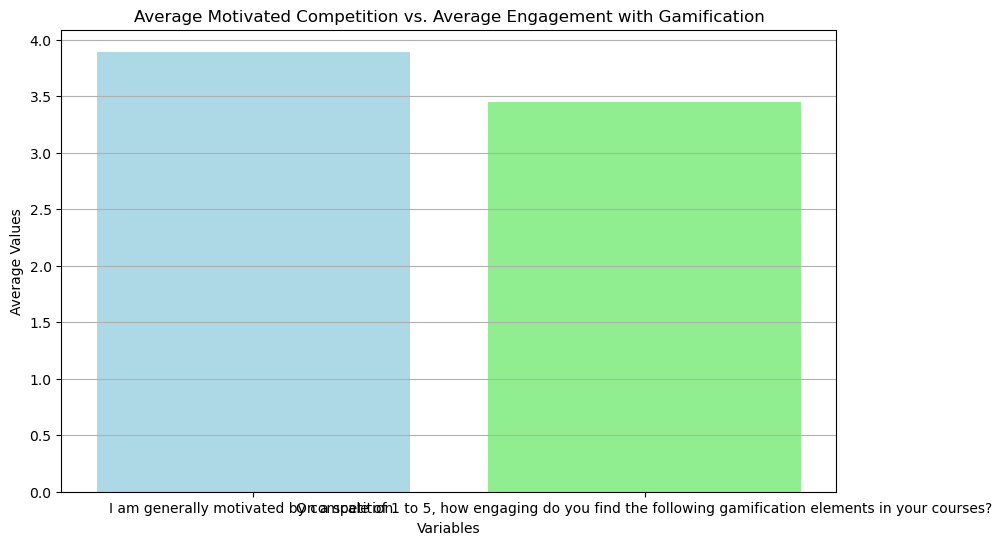

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:\\Users\\Script\\Desktop\\School things\\IRM3006\\IRM_3006_PandasP5\\GamificationResults.xlsx"
data = pd.read_excel(file_path)

# Define the two variables for visualization
variable1 = "I am generally motivated by competition."
variable2 = "On a scale of 1 to 5, how engaging do you find the following gamification elements in your courses?"

# Create a bar chart
plt.figure(figsize=(10, 6))
data_to_plot = [variable1, variable2]
average_values = [data[variable1].mean(), data[variable2].mean()]
plt.bar(data_to_plot, average_values, color=['lightblue', 'lightgreen'])

# Add title and labels
plt.title("Average Motivated Competition vs. Average Engagement with Gamification")
plt.xlabel("Variables")
plt.ylabel("Average Values")

# Show the plot
plt.grid(axis='y')
plt.show()

# Correlation of Gamified Elements vs. Engagement Levels

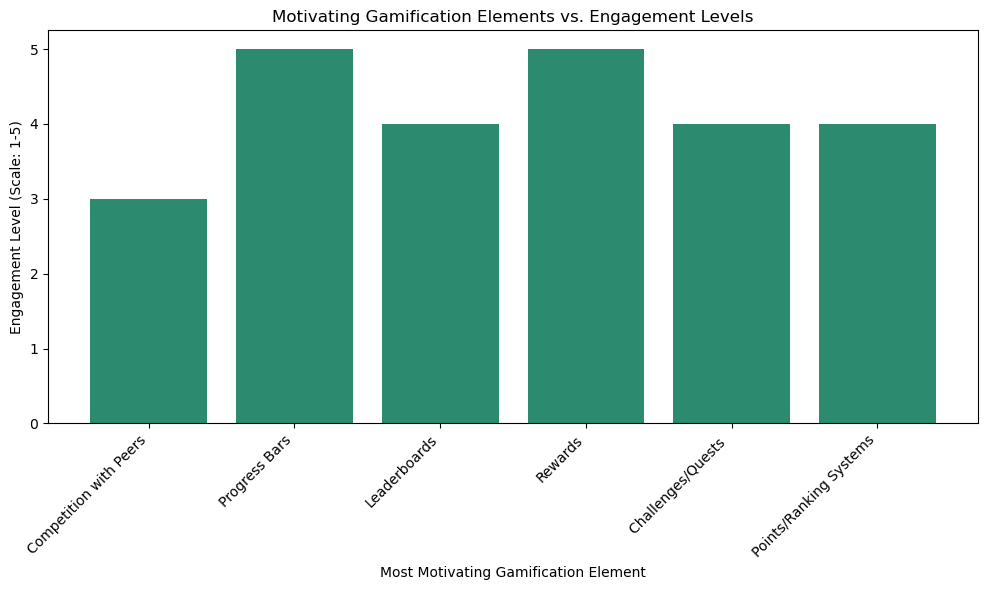

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:\\Users\\Script\\Desktop\\School things\\IRM3006\\IRM_3006_PandasP5\\GamificationResults.xlsx"
data = pd.read_excel(file_path)

# Select the relevant columns
x_column = "Which gamification element do you find most motivating, and why?"
y_column = "On a scale of 1 to 5, how engaging do you find the following gamification elements in your courses?"

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(data[x_column], data[y_column], color='#2C8A6E')
plt.title("Motivating Gamification Elements vs. Engagement Levels")
plt.xlabel("Most Motivating Gamification Element")
plt.ylabel("Engagement Level (Scale: 1-5)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure that labels are not cut off
plt.show() 

# Cramers V of Numerical Experience and Learning Styles

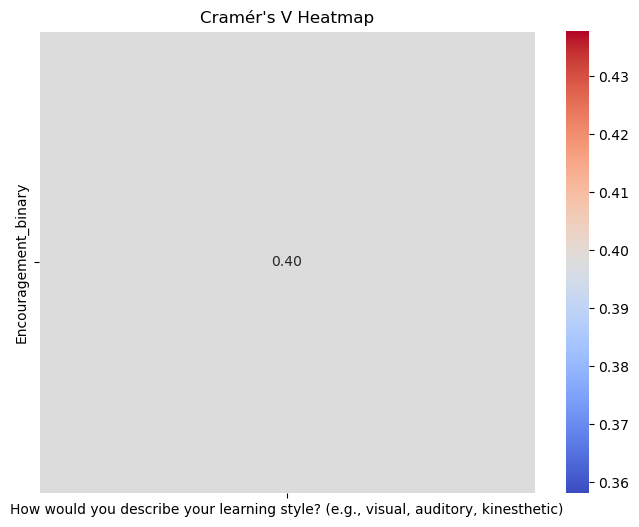

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Load the Excel file
file_path = "C:\\Users\\Script\\Desktop\\School things\\IRM3006\\IRM_3006_PandasP5\\GamificationResults.xlsx"
data = pd.read_excel(file_path)

# Specify the exact column names
encouragement_column = "Have you ever been encouraged to participate in course activities due to gamification elements \n(e.g., earning points or badges)? \n\nPlease provide an example."
learning_style_column = "How would you describe your learning style? (e.g., visual, auditory, kinesthetic)"

# Convert "Yes" and "No" to 1 and 0 for the binary column
data['Encouragement_binary'] = data[encouragement_column].map({'Yes': 1, 'No': 0})

# Create a contingency table
contingency_table = pd.crosstab(data['Encouragement_binary'], data[learning_style_column])

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_value = cramers_v(contingency_table.values)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap([[cramers_v_value]], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, xticklabels=[learning_style_column], yticklabels=['Encouragement_binary'])
plt.title("Cramér's V Heatmap")
plt.show()


# Data Cleaning of the quantity of replies. Finding Non- numerical values

In [9]:
import pandas as pd

# Load the Excel file
file_path = "C:\\Users\\Script\\Desktop\\School things\\IRM3006\\IRM_3006_PandasP5\\GamificationResults.xlsx"
data = pd.read_excel(file_path)

# Get the quantity of replies (number of rows)
quantity_of_replies = len(data)

# Add the quantity of replies as a new column (if needed)
data["Quantity of Replies"] = quantity_of_replies

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                                                    On a scale of 1 to 5, how engaging do you find the following gamification elements in your courses?  \
On a scale of 1 to 5, how engaging do you find ...                                           1.000000                                                     
I am generally motivated by competition.                                                     0.092285                                                     
I am self-driven and motivated to achieve perso...                                           0.186414                                                     
I find recognition and rewards highly motivating.                                            0.134493                                                     
On a scale of 1 to 5, how much do you agree tha...                                           0.069329                                                     
Quantity of Replies                                                   

# Break down of Columns and Unique Values

In [12]:
print (data.columns)

Index(['Timestamp', 'How Old Are You?', 'What's your gender?',
       'Year of Study?', 'What's your Major?',
       'On a scale of 1 to 5, how engaging do you find the following gamification elements in your courses?',
       'Which gamification element do you find most motivating, and why?',
       'Have you ever been encouraged to participate in course activities due to gamification elements \n(e.g., earning points or badges)? \n\nPlease provide an example.',
       'I am generally motivated by competition.',
       'I prefer learning in a collaborative environment.',
       'I am self-driven and motivated to achieve personal goals.',
       'I find recognition and rewards highly motivating.',
       'How would you describe your learning style? (e.g., visual, auditory, kinesthetic)',
       'In your opinion, do gamification elements work better for certain types of learners? Please explain.',
       'Have you noticed any differences in the impact of gamification on your engagement a

In [16]:
for column in columns_of_interest:
    unique_values = subset_data[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")


Column: On a scale of 1 to 5, how engaging do you find the following gamification elements in your courses?
Unique Values: [2 4 5 3 1]

Column: Which gamification element do you find most motivating, and why?
Unique Values: ['Competition with Peers' 'Progress Bars' 'Leaderboards' 'Rewards'
 'Challenges/Quests ' 'Points/Ranking Systems']

Column: Have you ever been encouraged to participate in course activities due to gamification elements 
(e.g., earning points or badges)? 

Please provide an example.
Unique Values: ['Yes' 'No']

